In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\spam.csv",encoding="latin-1")      # some time read_csv not understand datasets files so we use encoding
df = df[["v1","v2"]]
df.dropna(inplace=True)
df.columns =["label","message"]
l = LabelEncoder()
df["label"] =l.fit_transform(df["label"])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
X = df["message"]
y = df["label"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer     #Tfidfvectorizer is use to convert text into number
vector = TfidfVectorizer(stop_words="english")
X_train = vector.fit_transform(X_train)
X_test = vector.transform(X_test)

In [36]:
from sklearn.svm import SVC,SVR
s = SVC(kernel="linear")
s.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


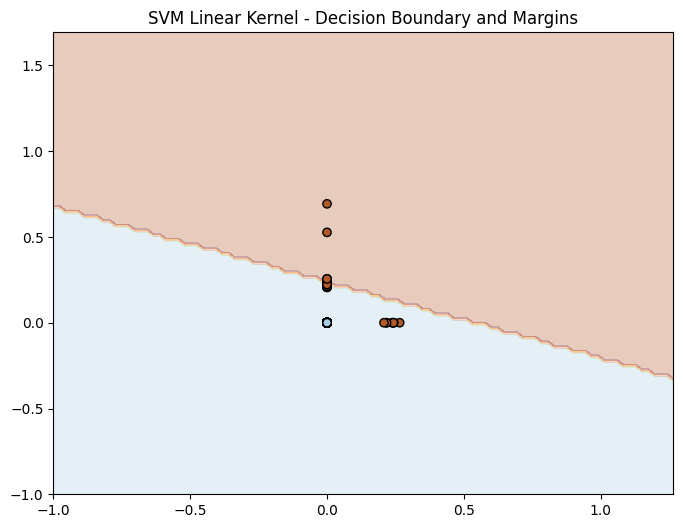

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

# Kyunki hum 2D graph chahte hain, hum sirf pehle 2 features lenge
# Note: Ye sirf visualization ke liye hai
X_train_2d = X_train[:, :2].toarray() 

# Model ko phir se fit karenge 2 features par
s_2d = SVC(kernel="linear")
s_2d.fit(X_train_2d, y_train)

# Graph Plotting
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Decision Boundary aur Margins dikhane ke liye
DecisionBoundaryDisplay.from_estimator(
    s_2d,
    X_train_2d,
    ax=ax,
    response_method="predict",
    cmap=plt.cm.Paired,
    alpha=0.3
)

# Data points plot karna
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("SVM Linear Kernel - Decision Boundary and Margins")
plt.show()

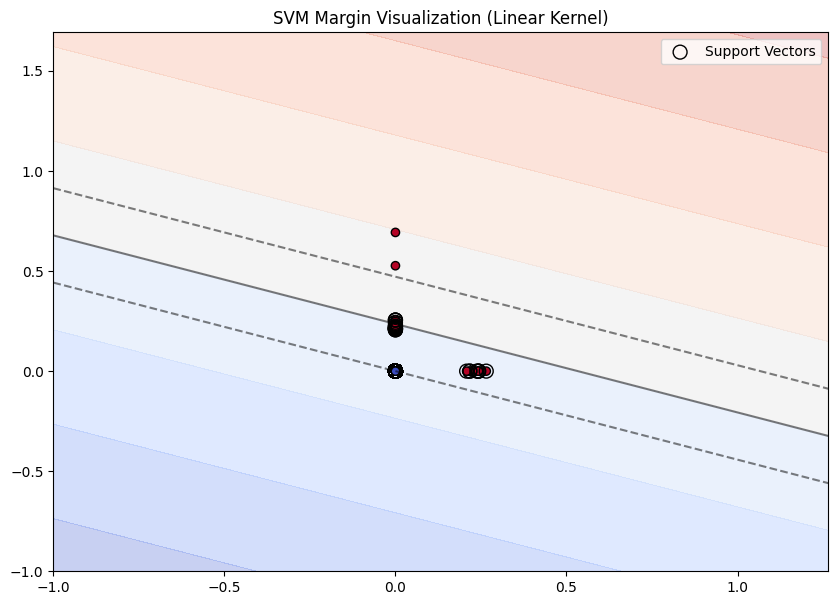

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

# Sirf visualization ke liye 2 features select kar rahe hain
X_viz = X_train[:, :2].toarray()
y_viz = y_train.values # Agar y_train Series hai toh .values use karein

# Model fit karna
s_viz = SVC(kernel="linear", C=1.0)
s_viz.fit(X_viz, y_viz)

# Plotting setup
plt.figure(figsize=(10, 7))
ax = plt.gca()

# 1. Decision Boundary aur Margins (Dotted Lines) plot karna
DecisionBoundaryDisplay.from_estimator(
    s_viz,
    X_viz,
    ax=ax,
    grid_resolution=500,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1], # -1 aur 1 margins hain, 0 main boundary hai
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

# 2. Background color bharna
DecisionBoundaryDisplay.from_estimator(
    s_viz,
    X_viz,
    ax=ax,
    grid_resolution=500,
    plot_method="contourf",
    cmap=plt.cm.coolwarm,
    alpha=0.3,
)

# 3. Data points aur Support Vectors ko highlight karna
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y_viz, cmap=plt.cm.coolwarm, edgecolors="k")

# Support vectors ko alag se circle karna (Optional)
ax.scatter(
    s_viz.support_vectors_[:, 0],
    s_viz.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)

plt.title("SVM Margin Visualization (Linear Kernel)")
plt.legend()
plt.show()

In [ ]:
Explain
Yaha hum SVM model bana rahe hain.

kernel='linear' ka matlab:

Model ek straight hyperplane (line) use karega data ko separate karne ke liye.

Text classification me usually:

✅ Linear kernel best kaam karta hai Kyunki text data already high-dimensional hota hai (bahut saare features).

🧠 Internally kya ho raha hai?

Yaad karo:

X_train = TF-IDF vectors (numbers)

y_train = 0 (ham) / 1 (spam)

SVM kya karta hai?

👉 Ek hyperplane dhundta hai 👉 Jo spam aur ham ko maximum margin ke saath separate kare

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = s.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
Precision (Kitna sateek hai): Jab model kehta hai ki ye "Class 1" hai, to wo kitni baar sahi hota hai? (Aapka 0.97 hai, matlab model jab spam/class 1 bolta hai to 97% sahi hota hai).

Recall (Kitna dhoond paaya): Asal mein jitne "Class 1" cases the, unmein se model ne kitne dhoond nikaale? (Aapka 0.87 hai, matlab 87% pakad paaya, baaki 13% miss ho gaye).

F1-Score: Ye Precision aur Recall ka balance hai. Agar ye 1 ke paas hai, to model solid hai.

Support: Ye batata hai ki aapke test data mein us class ke kitne actual samples the (Jaise Class 0 ke 965 samples hain).


Macro Avg: Dono classes ka simple average. Ye tab dekhte hain jab dono classes barabar important hon.

Weighted Avg: Ye samples (Support) ke hisaab se average nikalta hai. Kyunki aapke paas Class 0 ke samples zyada hain, isliye ye score Class 0 ki taraf zyada jhuka hua hai.

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[961   4]
 [ 19 131]]


In [43]:
# User se input lena
user_message = input("Enter your message: ")

# Text ko vector me convert karo (same vectorizer use karo)
user_vector = vector.transform([user_message])

# Prediction
prediction = s.predict(user_vector)

# Result print karo
if prediction[0] == 1:
    print("🚨 This is a SPAM message")
else:
    print("✅ This is NOT Spam")

Enter your message:  you got jacpot of 900000 and car


✅ This is NOT Spam
